<img src="./img/HWNI_logo.svg"/>

# Lab 02b - Visualizing Uncertainty

In [5]:
# makes our plots show up inside Jupyter
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# choose colors that work for most color-blind folks
sns.set_palette("colorblind")
sns.set(color_codes=True)

import util.lab02utils as utils 

# this makes our tables easier to read
utils.formatDataframes()

In [260]:
def plotGroups(df,x,by):
    facets = sns.FacetGrid(df,hue=by,size=6)
    facets.map(sns.distplot,x,
               kde=False,
               hist_kws={"histtype":"stepfilled",
                        "alpha":0.5,
                        "normed":True});
    plt.ylabel('p')
    
def generateDataset(N=1000):
    group1 = np.random.normal(0,1,size = N)
    group2 = np.random.normal(0.1,1,size = N)
    
    data = np.concatenate((group1,group2))
    df = pd.DataFrame.from_dict({'score':data,
                                 'group':['control']*N+['treatment']*N})
    
    return df

def addAxisLine(axis):
    xlims = axis.get_xlim()
    axis.hlines(0,xlims[0],xlims[1],
           color='grey',linestyle='--',linewidth=4);
    return

## Error Bars

There are many kinds of "error bars", each of which tells you something different about the uncertainty in the data being graphed.

Below, we'll generate a dataset containing two groups, one subjected to a treatment and the other left as a control. After looking at the data distribution, we'll plot the means of the two groups along with the three different kinds of error bars.

In [284]:
testData = generateDataset(N=2500)
testData.sample(10)

,group,score
1684,control,1.631031
770,control,-0.749584
3583,treatment,0.562386
762,control,-0.021663
237,control,-0.452268
848,control,-1.327602
438,control,1.594902
1295,control,0.844585
1736,control,-0.215222
3069,treatment,-0.193759


The cell below will plot histograms of the two datasets on top of each other.

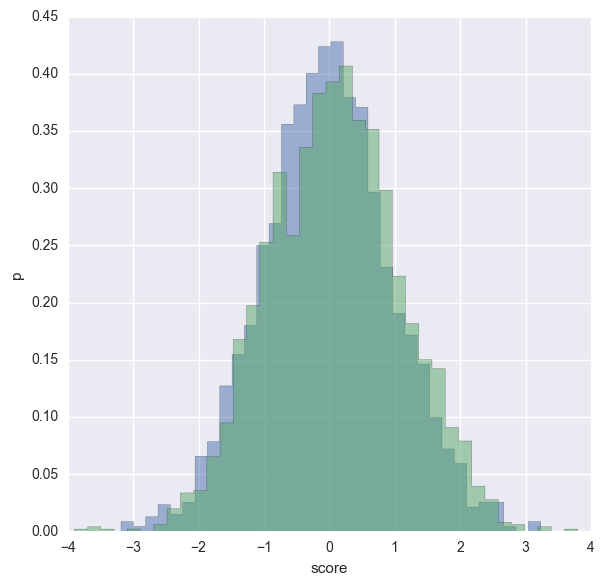

In [285]:
plotGroups(testData,x="score",by="group")

Do these two data distributions seem different to you? Why or why not?

<font color='#1874CD'> ** There's no right answer here. They are very similar indeed, but there are some slight differences that become especially obvious if you compare multiple random examples. **

We begin by plotting one of the most common error bars, the "95% confidence interval" error bar. What kind of uncertainty this bar indicate? Relatedly, in what situation is this error bar the right kind of error bar to attach to our data?

<font color='#1874CD'> ** A region that contains the true mean of the population 95% of the time. It's best for indicating whether a difference in means is likely due to chance or not.**

With overwhelming likelihood, the two bars overlap a small amount. Does this mean that the chance that the means are different is more than 95%? Hint: if you didn't read the *Points of Significance* article on error bars, you should!

<font color='#1874CD'>  ** No. In fact, if the bars were just touching, the chance that the means are different is much higher than 95%! **

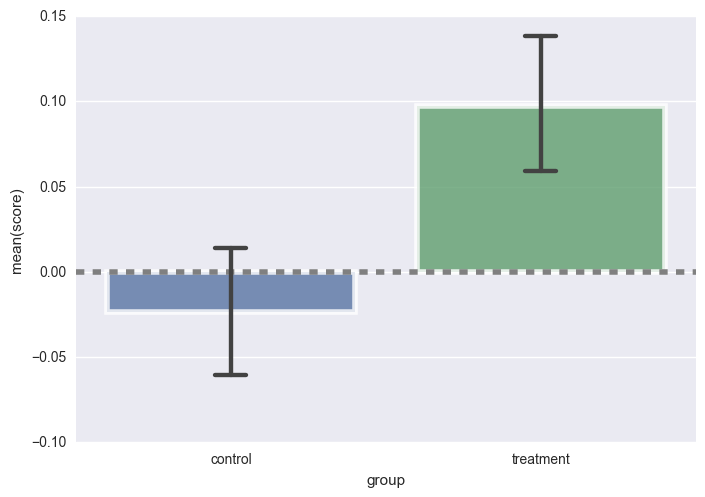

In [286]:
sns.barplot(data=testData,x='group',y='score',ci=95,
            capsize=.1,linewidth=4,
            alpha=0.8,edgecolor='white');

addAxisLine(plt.gca())

Another common error bar is the "standard error of the mean" error bar. What kind of uncertainty does this error bar indicate, and when is it the appropriate error bar to plot?

<font color='#1874CD'>  ** It shows the estimated standard deviation of the sampling distribution of the mean. For datasets whose means have a Gaussian sampling distribution, this corresponds to a 68% confidence interval. There are very few situations in which this error bar is appropriate, as the standard deviation of the sampling interval isn't very useful on its own, especially as a visual cue. **

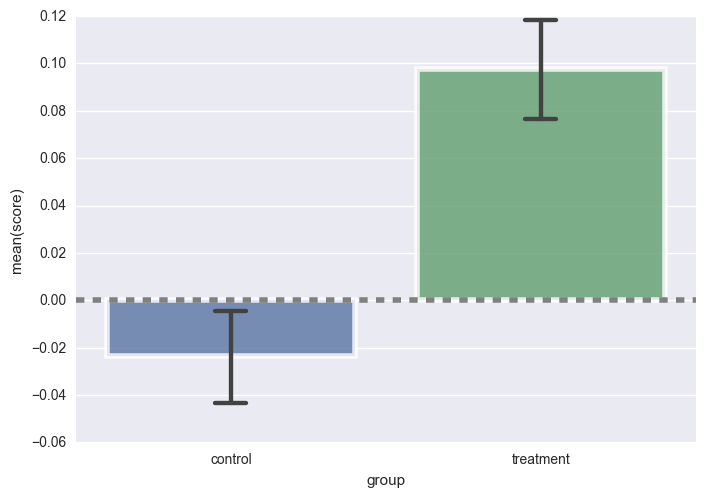

In [287]:
sns.barplot(data=testData,x='group',y='score',ci=68,
            capsize=.1,linewidth=4,alpha=0.8,edgecolor='white');

addAxisLine(plt.gca())

Lastly, we have a rather uncommon error bar, the "standard deviation of the data" error bar. How is it related to the "standard error of the mean" bar? What happens to each as the number of datapoints collected gets larger?

<font color='#1874CD'>  ** The standard deviation of the dataset is an estimator of the standard deviation of the population. The SEM is equal to the standard deviation divided by the square root of the size of the dataset, and it is the standard deviation of a sampling distribution, that of the mean.  While the standard error gets smaller as the size of the dataset gets bigger, the standard deviation does not -- it instead converges to the true value. **

*Side Note*: this kind of error bar is uncommon enough that seaborn doesn't have a built-in way to plot it. Check out the challenge question at the end of this lab if you want to learn more.

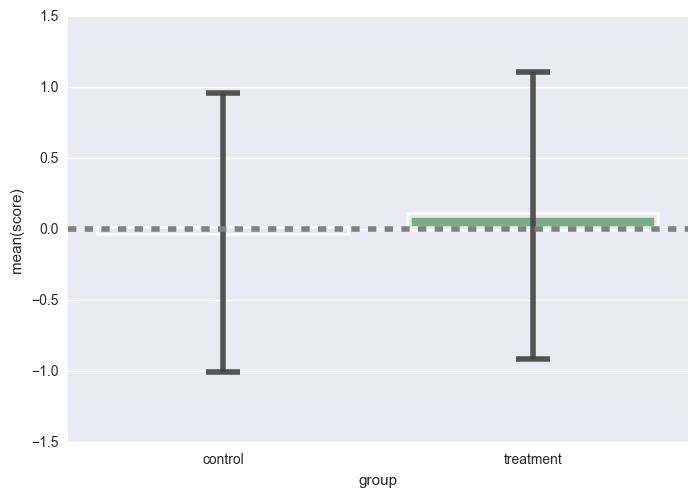

In [290]:
sns.barplot(data=testData,x='group',y='score',ci=None,capsize=.1,
           linewidth=4,alpha=0.8,edgecolor='white');

grouped = testData.groupby("group")
means = grouped.aggregate(np.mean).score
sds = grouped.aggregate(np.std).score

plt.errorbar([0,1],means,yerr=sds,
             linestyle='None',color=[.26]*3+[0.9],
             linewidth=4,capsize=12,capthick=4);

addAxisLine(plt.gca())

Some people would consider the two distributions, of the control group scores and the treatment group scores, to be quite similar. Which error bar or bars capture this intuition? Others might consider them to be quite different. Which error bar or bars capture this intuition?

<font color='#1874CD'> ** Those who consider the distributions similar would point to the standard deviation bars, which show that the datasets overlap substantially. Those who consider the distributions different would point to either the standard error of the mean bars, or, more reliably, the confidence interval bars, and note that the difference is not one you would expect to see by chance. **

** This difference in deciding whether a difference between distributions is important or notable is a contrast of the definitions of "scientific" or "practical" significance versus the definition of significance as "statistical". We'll cover this more in the next discussion. **

Relatedly, let's consider the use of these error bars in decision-making. Let's say our "treatment" was a lifestyle change, like cutting a particular food out of your diet, and our "score" was a measure of overall mortality -- higher values meaning higher risk of death. Which error bars would a nation's public health official use to decide whether to recommend that the citizens cut that food from their diet? Which error bars might an informed citizen use to decide how important heeding that recommendation is? Can you explain the difference?

Hint: imagine I give you one datapoint, which I took from one of the two distributions. Will it be easy to tell which distribution it came from? What about if I gave you one hundred million datapoints, all from the same distribution?

<font color='#1874CD'> ** A public health official cares very deeply about even small effects -- when applied to a large population, their aggregate effect is substantial. Put another way, even if an effect is only reliably detectable in large datasets, it's relevant for public health. A confidence interval from a large dataset tells you exactly whether an effect was detected in a large population.**

** An individual, however, only lives one life, not several million, so far as we can tell. If the difference caused by a lifestyle change is so small that it takes the observation of thousands of individuals to detect, it may be not worth the effort.**

** Challenge Question**: 

Seaborn plots error bars using a method called *bootstrapping*. Check out the optional reading, *Bootstrapping Confidence Intervals*, to learn more. What do we need in order to be able to use bootstrapping methods on our data?

In fact, all of the error bars plotted by seaborn are confidence intervals, with the confidence level determined by the keyword argument `ci`. In addition to making it possible to easily plot the confidence interval error bars, this also makes it possible to easily plot the standard error of the mean for most datasets, using, as above, a `ci` of 68. Can you explain why?

<font color='#1874CD'> ** We can use bootstrapping methods on our data when our datasets are large -- large enough that the empirical cumulative distribution function is "close enough" to the true cumulative distribution function. **

** The ± one SEM interval around the mean is, for data with a Gaussian sampling distribution, also approximately a 68% confidence interval.**